# Q-learning for task2

In [1]:
# EE488C Special Topics in EE <Deep Learning and AlphaGo>, Fall 2016
# Information Theory & Machine Learning Lab, School of EE, KAIST
# Wonseok Jeon and Sungik Choi (wonsjeon@kaist.ac.kr, si_choi@kaist.ac.kr)
# written on 2016/11/23

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from maze_environment import environment_maze_task2 as environment

In [50]:
# Parameters
num_rows = 5
num_columns = 5
num_states = num_rows * num_columns
num_actions = 4  #Up, down, left, right
connectivity = 0.2  # Determines the fraction of the walls in the maze
num_episodes = 9 # optimal 9
alpha = 0.5
gamma = 0.9
Q = np.zeros([num_states, num_actions]) # Q matrix is initialized as a 25 x 4 matrix

In [51]:
# First, generate a random maze by placing walls randomly
Mazewall = np.zeros([40])
#for i in range(40):
#    if np.random.random() < connectivity: # Walls are placed with probability 0.2
#        Mazewall[i] = 1
Mazewall[4] = 1
Mazewall[7] = 1
Mazewall[8] = 1
Mazewall[11] = 1
Mazewall[12] = 1
Mazewall[15] = 1
Mazewall[36] = 1
Mazewall[37] = 1
Mazewall[38] = 1

In [52]:
# Now, start the learning
for i_episodes in range(num_episodes):
    S = 0
    epsilon = 0.1 
    for t in range(1000):
        if np.random.random() < epsilon:
            A = np.random.randint(0, 4)
        else:  # Pick values according to the learned Q value
            maxQ = np.max(Q[S])
            A = np.random.choice(np.argwhere(Q[S] == maxQ).flatten())
            numQ = 0
            maxarray = np.zeros([num_actions])
        R, Sn, T = environment(
            S, A, Mazewall)  # Observe the outputs of the state transition
        Q[S, A] = (1 - alpha) * Q[S, A] + alpha * (
            R + gamma * np.max(Q[Sn]))  # Perform Q learning
        if T == 1:
            break
        S = Sn

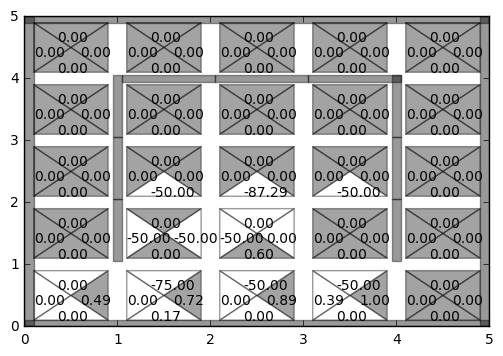

In [53]:
# plot maze and Q values
fig, ax = plt.subplots()
patches = []
for j in range(5):
    for i in range(5):
        polygon1 = Polygon(
            [[10.0 / 10 * i + 9.0 / 10, 10.0 * j / 10 + 1.0 / 10],
             [10.0 * i / 10 + 9.0 / 10, 10.0 * j / 10 + 9.0 / 10],
             [10.0 * i / 10 + 5.0 / 10, 10.0 * j / 10 + 5.0 / 10]], True)
        polygon2 = Polygon(
            [[10.0 * i / 10 + 1.0 / 10, 10.0 * j / 10 + 1.0 / 10],
             [10.0 * i / 10 + 1.0 / 10, 10.0 * j / 10 + 9.0 / 10],
             [10.0 * i / 10 + 5.0 / 10, 10.0 * j / 10 + 5.0 / 10]], True)
        polygon3 = Polygon(
            [[10.0 * i / 10 + 1.0 / 10, 10.0 * j / 10 + 1.0 / 10],
             [10.0 * i / 10 + 9.0 / 10, 10.0 * j / 10 + 1.0 / 10],
             [10.0 * i / 10 + 5.0 / 10, 10.0 * j / 10 + 5.0 / 10]], True)
        polygon4 = Polygon(
            [[10.0 * i / 10 + 1.0 / 10, 10.0 * j / 10 + 9.0 / 10],
             [10.0 * i / 10 + 9.0 / 10, 10.0 * j / 10 + 9.0 / 10],
             [10.0 * i / 10 + 5.0 / 10, 10.0 * j / 10 + 5.0 / 10]], True)
        patches.append(polygon1)
        patches.append(polygon2)
        patches.append(polygon3)
        patches.append(polygon4)
polygon = Polygon([[0.0, 0.0], [5.0, 0.0], [5.0, 0.1], [0.0, 0.1]], True)
patches.append(polygon)
polygon = Polygon([[0.0, 0.0], [0.0, 5.0], [0.1, 5.0], [0.1, 0.0]], True)
patches.append(polygon)
polygon = Polygon([[5.0, 5.0], [5.0, 0.0], [4.9, 0.0], [4.9, 5.0]], True)
patches.append(polygon)
polygon = Polygon([[5.0, 5.0], [0.0, 5.0], [0.0, 4.9], [5.0, 4.9]], True)
patches.append(polygon)

for i in range(5):
    for j in range(4):
        if Mazewall[4 * i + j] != 0:
            polygon = Polygon([[10.0 * j / 10 + 0.95, 10.0 * i / 10 + 0.05],
                               [10.0 * j / 10 + 0.95, 10.0 * i / 10 + 1.05],
                               [10.0 * j / 10 + 1.05, 10.0 * i / 10 + 1.05],
                               [10.0 * j / 10 + 1.05, 10.0 * i / 10 + 0.05]],
                              True)
            patches.append(polygon)
for i in range(4):
    for j in range(5):
        if Mazewall[20 + 5 * i + j] != 0:
            polygon = Polygon([[10.0 * j / 10 + 0.05, 10.0 * i / 10 + 0.95],
                               [10.0 * j / 10 + 1.05, 10.0 * i / 10 + 0.95],
                               [10.0 * j / 10 + 1.05, 10.0 * i / 10 + 1.05],
                               [10.0 * j / 10 + 0.05, 10.0 * i / 10 + 1.05]],
                              True)
            patches.append(polygon)
p = PatchCollection(patches, cmap=matplotlib.cm.gray, alpha=0.4)
colors = np.ones([104 + int(np.sum(Mazewall))])

for i in range(25):
    maxval = Q[i, :].max(0)
    for j in range(4):
        if Q[i, j] == maxval:
            colors[4 * i + 3 - j] = 0.1
for i in range(4 + int(np.sum(Mazewall))):
    colors[100 + i] = 0

# show Q values
p.set_array(np.array(colors))
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.add_collection(p)
for i in range(5):
    for j in range(5):
        plt.text(1.0 * i + 0.6, 1.0 * j + 0.35,
                 "{0:.2f}".format(Q[5 * j + i, 3]))
        plt.text(1.0 * i + 0.1, 1.0 * j + 0.35,
                 "{0:.2f}".format(Q[5 * j + i, 2]))
        plt.text(1.0 * i + 0.35, 1.0 * j + 0.1,
                 "{0:.2f}".format(Q[5 * j + i, 1]))
        plt.text(1.0 * i + 0.35, 1.0 * j + 0.6,
                 "{0:.2f}".format(Q[5 * j + i, 0]))

plt.show()